## Group : Alexandre Brasileiro Fernandes, Jorge Cordeiro Beleza da Silva, Mateus Abdallah Fonseca

## Import libraries

In [49]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# So that the plot will be saved within the jupyter notebook
%matplotlib inline

# Part A. Regression Modelling Requirement

## Reading the dataset, get some informations and handling missing rows

In [50]:
# Load the dataset and get a peak 
df = pd.read_csv('unclean_data.csv')
df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [51]:
# Summary of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   object 
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel type     1329 non-null   object 
 6   engine size   3842 non-null   object 
 7   mileage2      3890 non-null   object 
 8   fuel type2    3808 non-null   object 
 9   engine size2  3808 non-null   object 
 10  reference     3907 non-null   object 
dtypes: float64(1), object(10)
memory usage: 344.4+ KB


In [52]:
# Get the sum of all null values in each column
df.isnull().sum()

model             99
year             102
price             99
transmission      99
mileage          198
fuel type       2677
engine size      164
mileage2         116
fuel type2       198
engine size2     198
reference         99
dtype: int64

In [53]:
# Dropping null values and reset the index
df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
5,C Class,2020.0,"£30,999",Automatic,NaN,Diesel,2,"1,000",NaN,NaN,/ad/25059312
6,C Class,2020.0,"£35,999",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25418851
7,C Class,2019.0,"£37,990",Automatic,NaN,Petrol,3,"1,412",NaN,NaN,/ad/25449314
8,C Class,2019.0,"£28,990",Automatic,NaN,Diesel,2,"3,569",NaN,NaN,/ad/25046820
9,C Class,2019.0,"£28,990",Automatic,NaN,Diesel,2,"3,635",NaN,NaN,/ad/25046821


## Handling the currency symbols and comma format in price column

In [54]:
# Replace the currency character and the comma from price column
df['price'] = df['price'].str.replace('£', ' ')
df['price'] = df['price'].str.replace(',', '')
df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


## Handling non-valid column names

In [55]:
# Rename the names of some columns
df.rename(columns={'fuel type':'fuel_type', 'engine size':'engine_size', 
                   'fuel type2':'fuel_type2','engine size2':'engine_size2'}, inplace=True)
df.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


## Handling missing values in columns: fuel_type

In [56]:
# getting the sum of null values of fuel_type column
df.fuel_type.isnull().sum()

2578

In [57]:
# getting the sum of null values of fuel_type2 column
df.fuel_type2.isnull().sum()

99

In [58]:
# fill missing values in fuel_type2 column with values from fuel_type
df.fuel_type2.fillna(df.fuel_type, inplace=True)

In [59]:
# checking the missing values
df.fuel_type2.isnull().sum()

0

In [60]:
# dropping fuel_type column
df.drop(columns=['fuel_type'], inplace=True)

In [61]:
#rename the fuel_type2 column
df.rename(columns={'fuel_type2':'fuel_type'}, inplace=True)

## Handling missing values in columns: mileage

In [62]:
df.mileage.isnull().sum()

99

In [63]:
df.mileage2.isnull().sum()

17

In [64]:
# fill missing values in mileage2 column with values from mileage
df.mileage2.fillna(df.mileage, inplace=True)

In [65]:
# remove the comma from mileage2 column
df['mileage2'] = df['mileage2'].str.replace(',', '')

In [66]:
# parse the values of mileage2 to numerical
df.mileage2 = pd.to_numeric(df['mileage2'], errors='coerce')

In [67]:
# drop mileage column
df.drop(columns=['mileage'], inplace=True)

In [68]:
#rename the mileage2 column
df.rename(columns={'mileage2':'mileage'}, inplace=True)

## Handling missing values and different value standard in column: engine_size

In [69]:
df.engine_size.isnull().sum()

65

In [70]:
df.engine_size2.isnull().sum()

99

In [71]:
# fill missing values in engine_size column with values from engine_size2
df.engine_size.fillna(df.engine_size2, inplace=True)

In [72]:
# remove the currency sign from engine_size column
df['engine_size'] = df['engine_size'].str.replace('£', '')

In [73]:
# parse the values of engine_size to numerical
df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')

In [74]:
# Standardizing the values into engine size
standard_size = lambda x: round(x/1000,1) if x > 1000 else round(x,1)
df['engine_size'] = df['engine_size'].apply(standard_size)

In [75]:
df.drop(columns=['engine_size2'], inplace=True)

## Handling wrong data type: year

In [76]:
# dropping the remaining null values
df.dropna(inplace=True)

In [77]:
# changing the data type of the year column
df.year = df.year.astype('int64')

## Handling unneeded columns

In [78]:
# dropping unneeded columns
df.drop(columns=['model','reference'], inplace=True)

## Handling categorical data

In [79]:
# converting transmission and fuel_type columns into dummies values
# also rename the other column into otherFuel
dummiesTransmission = pd.get_dummies(df['transmission'], dtype='int')
dummiesFuel = pd.get_dummies(df['fuel_type'], dtype='int')
dummiesFuel = dummiesFuel.rename(columns={'Other':'otherFuel'})



In [80]:
# join the dummiesFuel dataframe into the main dataframe
df = df.join(dummiesFuel)

In [81]:
# join the dummiesTransmission dataframe into the main dataframe
df = df.join(dummiesTransmission)

In [82]:
# rename the other column into otherTransmission
df.rename(columns={'Other':'otherTransmission'}, inplace=True)

In [83]:
# dropping transmission and fuel_type columns
df.drop(columns=['transmission', 'fuel_type'], inplace=True)

In [84]:
df

,year,price,engine_size,mileage,Diesel,Hybrid,otherFuel,Petrol,Automatic,Manual,otherTransmission,Semi-Auto
0,2020,30495,2.0,1200.0,1,0,0,0,1,0,0,0
1,2020,29989,1.5,1000.0,0,0,0,1,1,0,0,0
2,2020,37899,2.0,500.0,1,0,0,0,1,0,0,0
3,2019,30399,2.0,5000.0,1,0,0,0,1,0,0,0
4,2019,29899,2.0,4500.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2017,14700,150.0,70.6,1,0,0,0,0,1,0,0
3903,2018,18500,150.0,64.2,1,0,0,0,1,0,0,0
3904,2014,11900,20.0,65.7,1,0,0,0,0,1,0,0
3905,2014,11300,145.0,56.5,1,0,0,0,1,0,0,0


In [85]:
# parse the values of price to numerical
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [86]:
# making sure that values of mileage and price are into numeric format
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3902 entries, 0 to 3906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               3902 non-null   int64  
 1   price              3902 non-null   int64  
 2   engine_size        3902 non-null   float64
 3   mileage            3902 non-null   float64
 4   Diesel             3902 non-null   int64  
 5   Hybrid             3902 non-null   int64  
 6   otherFuel          3902 non-null   int64  
 7   Petrol             3902 non-null   int64  
 8   Automatic          3902 non-null   int64  
 9   Manual             3902 non-null   int64  
 10  otherTransmission  3902 non-null   int64  
 11  Semi-Auto          3902 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 525.3 KB


## Saving the cleaned data into csv format

In [87]:
# checking any null values
df.isnull().sum()

year                 0
price                0
engine_size          0
mileage              0
Diesel               0
Hybrid               0
otherFuel            0
Petrol               0
Automatic            0
Manual               0
otherTransmission    0
Semi-Auto            0
dtype: int64

In [88]:
# saving the dataset
df.to_csv('cleaned_data.csv', index=False)

## Exploratory Data Analysis and Visualization

In [89]:
# load the cleaned dataset and have a peek at the dataset
df = pd.read_csv('cleaned_data.csv')
print('This dataset has {} data points with {} variables'.format(*df.shape))
df.head()

This dataset has 3902 data points with 12 variables


,year,price,engine_size,mileage,Diesel,Hybrid,otherFuel,Petrol,Automatic,Manual,otherTransmission,Semi-Auto
0,2020,30495,2.0,1200.0,1,0,0,0,1,0,0,0
1,2020,29989,1.5,1000.0,0,0,0,1,1,0,0,0
2,2020,37899,2.0,500.0,1,0,0,0,1,0,0,0
3,2019,30399,2.0,5000.0,1,0,0,0,1,0,0,0
4,2019,29899,2.0,4500.0,1,0,0,0,1,0,0,0


In [90]:
# get some summary statistics 
df.describe()

,year,price,engine_size,mileage,Diesel,Hybrid,otherFuel,Petrol,Automatic,Manual,otherTransmission,Semi-Auto
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,2017.343670,23690.470272,114.068016,1215.691620,0.599949,0.038954,0.001538,0.359559,0.417991,0.050999,0.000256,0.530753
std,2.204964,8960.813989,65.740359,8803.921077,0.489971,0.193511,0.039188,0.479933,0.493292,0.220025,0.016009,0.499117
min,1991.000000,1290.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17696.000000,30.000000,46.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,145.000000,58.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2019.000000,28900.000000,145.000000,64.200000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,580.000000,173000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### An overview of the dataset

 - For this project, the features year, price, mileage, and engine_size are used from the clean_data.csv where the price is the target feature and the other ones are the independent features. Their meaning is presented below:
 
     - year: is the year when the car was manufactured
     - price: given in British currency and not adjusted based on the inflation of the period
     - mileage: represents the distance traveled by the car after it was purchased
     - engine_size: number of cilinders in the car
     - Automatic, semi-automatic, manual and otherTransmission are the way that the car is driven
     - Petrol, diesel, hybrid, otherFuel are the type of fuel used by the car

- Based on some intuitives:
    - The lesser the mileage, higher the cars' price
    - New cars are more expensive
    - Bigger the engine size, greater the power and more expensive
    - Depends on the type of fuel cars will be more affordable than other.

### Assumption for outliers

In [91]:
# find out some cars' price close to the max value
df.loc[df['price'] >= 35000].index

Index([   2,    6,    7,   79,   80,   81,  183,  185,  232,  299,
       ...
       3768, 3777, 3817, 3818, 3828, 3838, 3840, 3859, 3871, 3891],
      dtype='int64', length=288)

In [92]:
# drop the outliers
df.drop(df.loc[df['price'] >= 35000].index, inplace=True)
print('This dataset has {} data points with {} variables'.format(*df.shape))

This dataset has 3614 data points with 12 variables


### Creating a new dataframe based on numerical variables

In [93]:
df_num = pd.DataFrame(df, columns=['year', 'mileage', 'engine_size', 'price'])
df_num.head()

,year,mileage,engine_size,price
0,2020,1200.0,2.0,30495
1,2020,1000.0,1.5,29989
3,2019,5000.0,2.0,30399
4,2019,4500.0,2.0,29899
5,2020,1000.0,2.0,30999


In [94]:
df_num.describe()

,year,mileage,engine_size,price
count,3614.000000,3614.000000,3614.000000,3614.000000
mean,2017.223298,1285.127836,111.761262,22065.164361
std,2.232215,9115.637701,66.037711,6618.357421
min,1991.000000,23.000000,0.000000,1290.000000
25%,2016.000000,47.100000,30.000000,17250.000000
50%,2018.000000,60.100000,145.000000,21991.000000
75%,2019.000000,64.200000,145.000000,27399.750000
max,2020.000000,173000.000000,580.000000,34999.000000


### Finding relationship between features

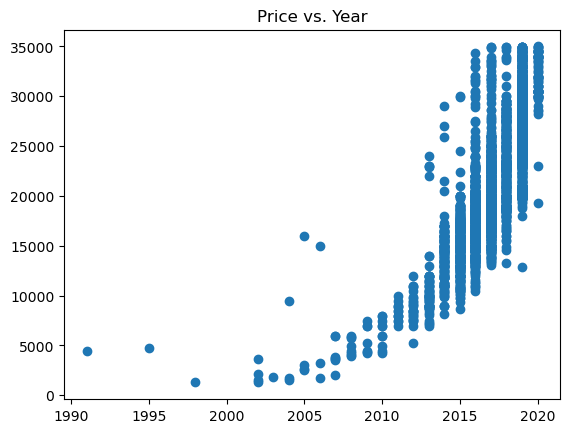

In [96]:
# create some visualizations
plt.scatter(df_num.year, df_num.price)
plt.title('Price vs. Year')
plt.show()